<a href="https://colab.research.google.com/github/SAaradhya/Design-of-Wind-Turbine/blob/main/polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y dataset')

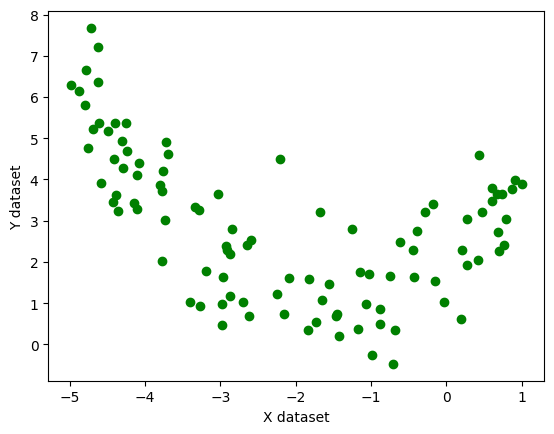

In [ ]:
X = 6 * np.random.rand(100, 1) - 5
y =0.5 * X**2 + 1.5*X + 2  + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [ ]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score)

0.2005130044491812


Text(0, 0.5, 'Y')

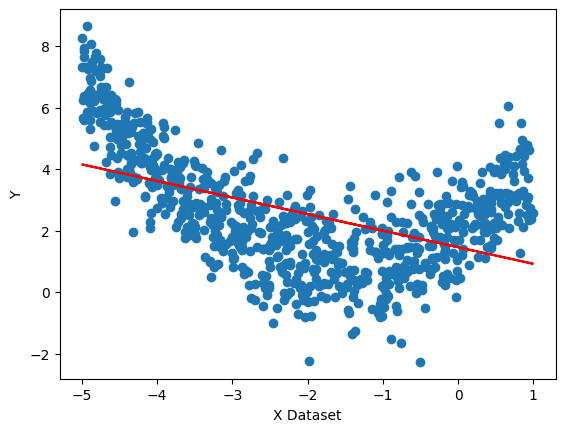

In [ ]:
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [ ]:
# Lets check with polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias =  True)
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# X_train_poly

array([[ 1.00000000e+00, -3.17180554e-02,  1.00603504e-03],
       [ 1.00000000e+00, -2.95418754e+00,  8.72722400e+00],
       [ 1.00000000e+00, -1.61840536e+00,  2.61923592e+00],
       ...,
       [ 1.00000000e+00, -1.41266524e+00,  1.99562308e+00],
       [ 1.00000000e+00,  4.43019471e-01,  1.96266251e-01],
       [ 1.00000000e+00, -4.15303227e+00,  1.72476770e+01]])

In [ ]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(regression.coef_)

[[0.         1.43061384 0.4842168 ]]


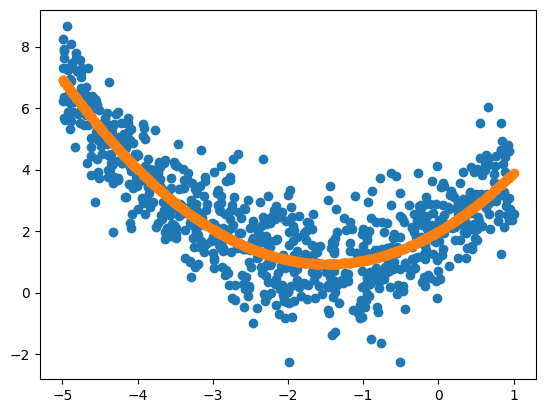

In [ ]:
plt.scatter(X_train,  y_train)
plt.scatter(X_train,  regression.predict(X_train_poly))


In [ ]:
poly = PolynomialFeatures(degree=3, include_bias =  True)
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# X_train_poly

In [ ]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(regression.coef_)
print(score)

[[0.00000000e+00 1.43624371e+00 4.89050605e-01 7.87272817e-04]]
0.7434453978078739


In [ ]:
#prediction of new data
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)


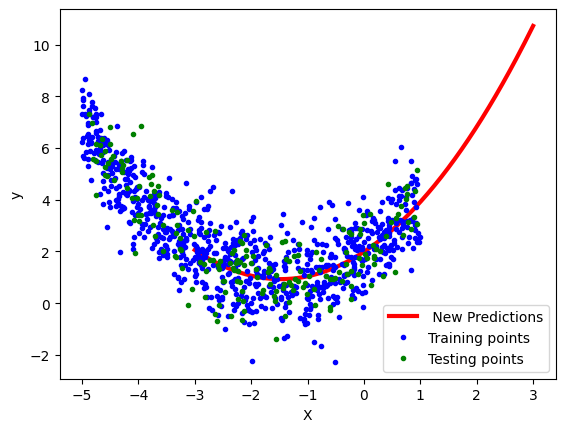

In [ ]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=3, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()


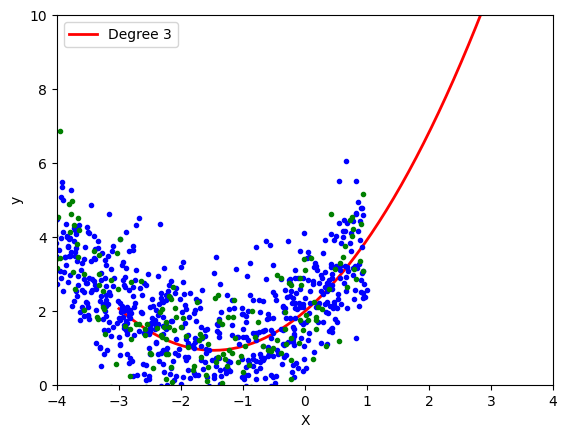

In [ ]:
poly_regression(3)